# *Exercises*

1. Our Bayes Factor (BF) assumed that we are looking at H1:P(prize) = 0.5. This allowed us to derive at a Beta distribution with a prior of Beta(1,1). Assume a H1:P(prize) = 0.24 and check if the resulting distribution is different from the original

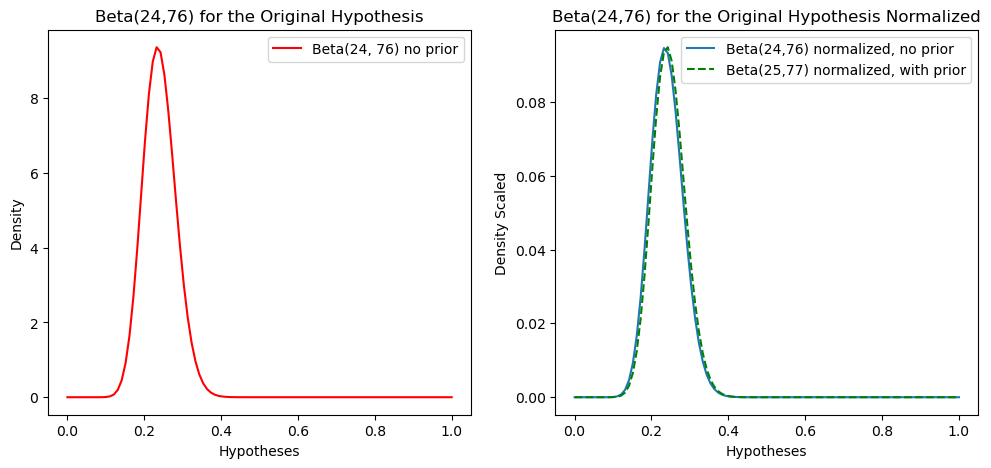

In [22]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Original
alpha_ = 24
beta_ = 76
x = np.linspace(0, 1, 100)
prior = {'alpha':1, 'beta':1}

y = beta.pdf(x, alpha_, beta_)

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12, 5))
# Original
ax1.plot(x, y, label='Beta(24, 76) no prior', color='red')
ax1.set_title('Beta(24,76) for the Original Hypothesis')
ax1.set_xlabel('Hypotheses')
ax1.set_ylabel('Density')
ax1.legend()

# Normalized
y_normal = y/sum(y)
ax2.plot(x, y_normal, label='Beta(24,76) normalized, no prior')
ax2.set_title('Beta(24,76) for the Original Hypothesis Normalized')
ax2.set_xlabel('Hypotheses')
ax2.set_ylabel('Density Scaled')

# With prior
y = beta.pdf(x, alpha_+prior['alpha'], beta_+prior['beta'])
y_normal = y/sum(y)
ax2.plot(x, y_normal, 'g--', label='Beta(25,77) normalized, with prior')
ax2.legend()
plt.show()




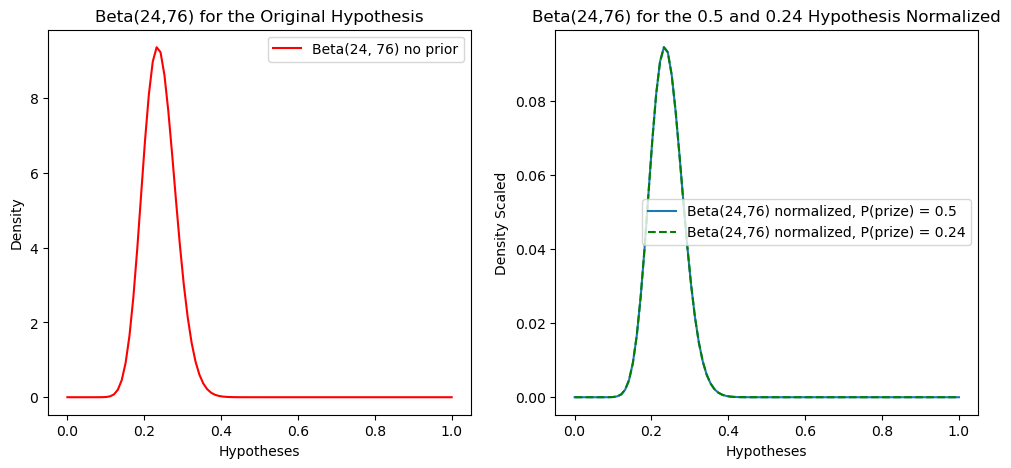

In [34]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Original
alpha_ = 24
beta_ = 76
x = np.linspace(0, 1, 100)
prior = {'alpha':1, 'beta':1}

y = beta.pdf(x, alpha_, beta_)

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12, 5))
# Original
ax1.plot(x, y, label='Beta(24, 76) no prior', color='red')
ax1.set_title('Beta(24,76) for the Original Hypothesis')
ax1.set_xlabel('Hypotheses')
ax1.set_ylabel('Density')
ax1.legend()

# Normalized
bayes_factor1 = y/(0.5**24*(1-0.5)**76)
bf1_scaled = bayes_factor1/sum(bayes_factor1)
bayes_factor2 = y/(0.24**24*(1-0.24)**76)
bf2_scaled = bayes_factor2/sum(bayes_factor2)

ax2.plot(x, bf1_scaled, label='Beta(24,76) normalized, P(prize) = 0.5')
ax2.plot(x, bf2_scaled, 'g--', label='Beta(24,76) normalized, P(prize) = 0.24')
ax2.set_title('Beta(24,76) for the 0.5 and 0.24 Hypothesis Normalized')
ax2.set_xlabel('Hypotheses')
ax2.set_ylabel('Density Scaled')
ax2.legend()


plt.show()


2. You play anoter Duck gam with 34 wins and 66 loses. What is the probability that you have a better chance of winning in this game than the original?

P(p2 > p1) ≈ 94.23%


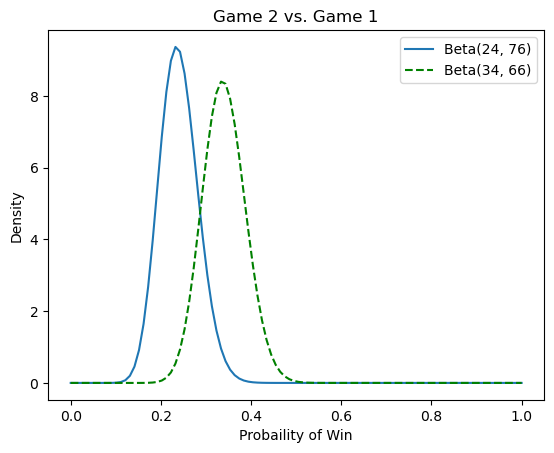

In [45]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

alpha1, beta1 = 24, 76
alpha2, beta2 = 34, 66

# Draw samples
N = 1_000_000
samples1 = beta.rvs(alpha1, beta1, size=N)
samples2 = beta.rvs(alpha2, beta2, size=N)

# Estimate P(p2 > p1)
prob = np.mean(samples2 > samples1)
print(f"P(p2 > p1) ≈ {prob*100:.2f}%" )

x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, alpha1, beta1), label = 'Beta(24, 76)')
plt.plot(x, beta.pdf(x, alpha2, beta2),'g--', label = 'Beta(34, 66)')
plt.title('Game 2 vs. Game 1')
plt.xlabel('Probaility of Win')
plt.ylabel('Density')
plt.legend()

plt.show()
